<a href="https://colab.research.google.com/github/jimmy86417/multimediaN/blob/master/Keras_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=16,
  kernel_size=(5,5),
  padding='same',
  input_shape=(28,28,1),
  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
  kernel_size=(5,5),
  padding='same',
  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))        
model.add(Dropout(0.5))         
model.add(Dense(10,activation='softmax'))
print(model.summary())

W0615 10:28:44.406203 140191532758912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 10:28:44.454042 140191532758912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 10:28:44.465708 140191532758912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 10:28:44.515256 140191532758912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0615 10:28:44.536534 140191532758912 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [4]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,
  y=y_TrainOneHot,validation_split=0.2,
  epochs=20, batch_size=300,verbose=2)

W0615 10:29:08.934934 140191532758912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 10:29:08.968296 140191532758912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 10:29:09.120446 140191532758912 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 54s - loss: 0.4896 - acc: 0.8479 - val_loss: 0.0958 - val_acc: 0.9728
Epoch 2/20
 - 53s - loss: 0.1403 - acc: 0.9585 - val_loss: 0.0632 - val_acc: 0.9796
Epoch 3/20
 - 53s - loss: 0.1028 - acc: 0.9692 - val_loss: 0.0508 - val_acc: 0.9843
Epoch 4/20
 - 53s - loss: 0.0839 - acc: 0.9752 - val_loss: 0.0452 - val_acc: 0.9858
Epoch 5/20
 - 53s - loss: 0.0715 - acc: 0.9774 - val_loss: 0.0395 - val_acc: 0.9879
Epoch 6/20
 - 53s - loss: 0.0647 - acc: 0.9805 - val_loss: 0.0394 - val_acc: 0.9887
Epoch 7/20
 - 54s - loss: 0.0562 - acc: 0.9826 - val_loss: 0.0445 - val_acc: 0.9867
Epoch 8/20
 - 54s - loss: 0.0515 - acc: 0.9842 - val_loss: 0.0347 - val_acc: 0.9897
Epoch 9/20
 - 53s - loss: 0.0452 - acc: 0.9867 - val_loss: 0.0340 - val_acc: 0.9900
Epoch 10/20
 - 53s - loss: 0.0423 - acc: 0.9871 - val_loss: 0.0331 - val_acc: 0.9903
Epoch 11/20
 - 53s - loss: 0.0411 - acc: 0.9877 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 12/20
 - 53s - los

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

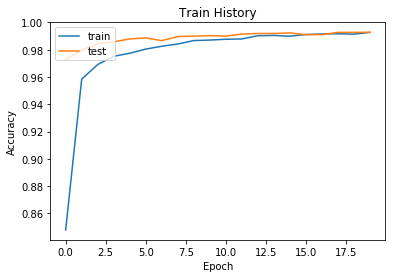

In [7]:
show_train_history('acc','val_acc')

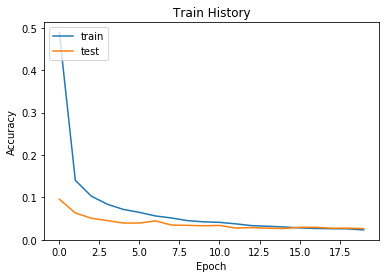

In [8]:
show_train_history('loss','val_loss')

In [9]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 335us/step


0.9942

In [10]:
prediction=model.predict_classes(x_Test4D_normalize)

prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

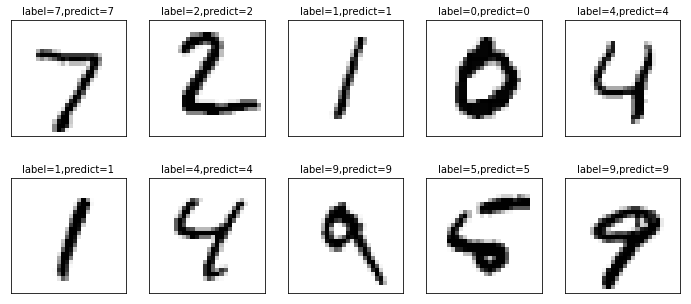

In [11]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    ax.set_title("label="+str(labels[idx])+
      ",predict="+str(prediction[idx])
      ,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [12]:
import pandas as pd
pd.crosstab(y_Test,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,0,0,1,3,1,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,1,1002,0,4,0,1,2,0
4,0,0,0,0,978,0,0,0,2,2
5,0,0,0,3,0,888,1,0,0,0
6,2,2,0,0,1,1,952,0,0,0
7,0,2,1,0,0,0,0,1022,1,2
8,1,0,1,1,0,2,0,2,964,3


In [14]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2369,5,3
2597,5,3
